## Use machine learning to create a model that predicts house price in Ames Housing dataset

### Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


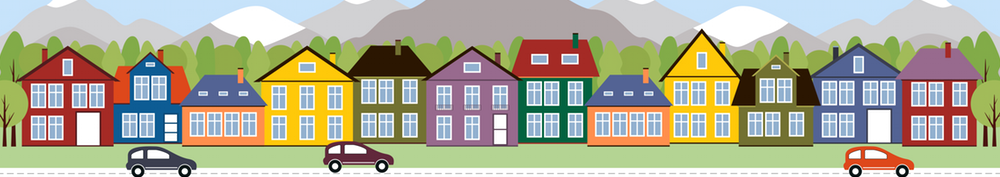

### Practice Skills

Creative feature engineering 

Advanced regression techniques like random forest and gradient boosting


### Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train = train.set_index('Id')

In [6]:
print("The train data size after setting Id feature as index is : {} ".format(train.shape))
print("The test data size is : {} ".format(test.shape))

The train data size after setting Id feature as index is : (1460, 80) 
The test data size is : (1459, 80) 


## Data Processing 

#### Let's find outlier(if present) in each column

Let's find out all the integer and flaot columns

In [7]:
lst = []
for c in train.columns:
    if train[c].dtype == 'int64' or train[c].dtype == 'float64':
        lst.append(c)
print(lst)        

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


We will see their meaning from data description file and then plot it vs SalePrice(if required) of each column to detect outliers

LotFrontage :- Linear feet of street connected to property

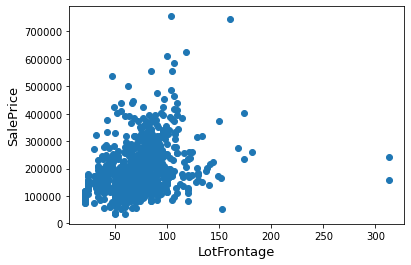

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = train['LotFrontage'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

In [9]:
train = train.drop(train[(train['LotFrontage']>300)].index)

LotArea :- Lot size in square feet

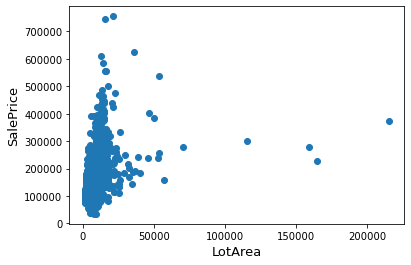

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['LotArea'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

In [11]:
train = train.drop(train[(train['LotArea']>100000)].index)

MasVnrArea :- Masonry veneer area in square feet

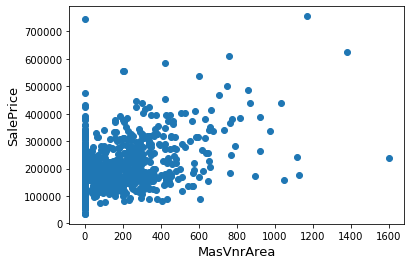

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = train['MasVnrArea'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('MasVnrArea', fontsize=13)
plt.show()

In [13]:
train = train.drop(train[(train['MasVnrArea']>1400)].index)

BsmtFinSF2 :- Type 2 finished square feet

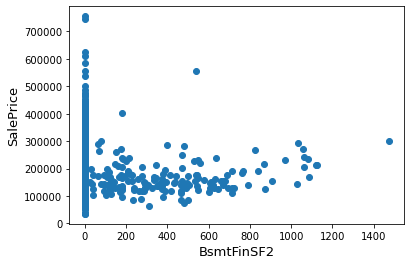

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = train['BsmtFinSF2'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('BsmtFinSF2', fontsize=13)
plt.show()

In [15]:
train = train.drop(train[(train['BsmtFinSF2']>1400)].index)

LowQualFinSF :- Low quality finished square feet (all floors)

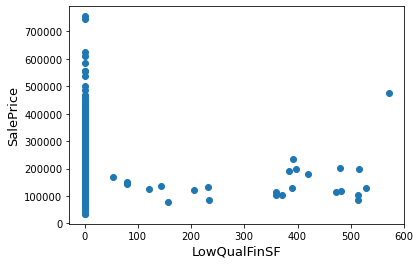

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = train['LowQualFinSF'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LowQualFinSF', fontsize=13)
plt.show()


In [17]:
train = train.drop(train[(train['LowQualFinSF']>500) & (train['SalePrice']>400000)].index)

GrLivArea :- Above grade (ground) living area square feet

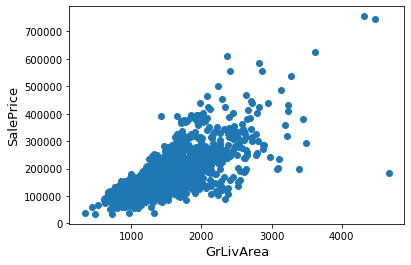

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


In [19]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

WoodDeckSF:- Wood deck area in square feet

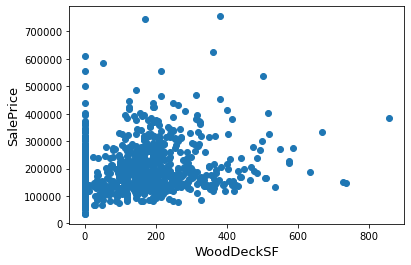

In [20]:
fig, ax = plt.subplots()
ax.scatter(x = train['WoodDeckSF'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('WoodDeckSF', fontsize=13)
plt.show()


In [21]:
train = train.drop(train[(train['WoodDeckSF']>800)].index)

EnclosedPorch:- Enclosed porch area in square feet

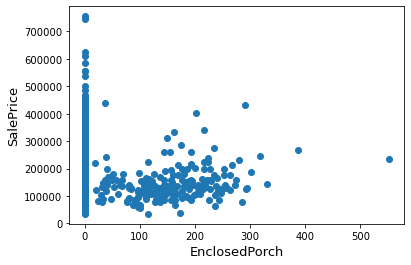

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = train['EnclosedPorch'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('EnclosedPorch', fontsize=13)
plt.show()


In [23]:
train = train.drop(train[(train['EnclosedPorch']>500)].index)

3SsnPorch :- Three season porch area in square feet

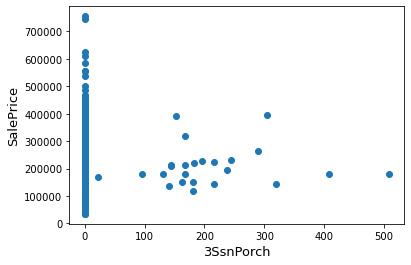

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = train['3SsnPorch'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('3SsnPorch', fontsize=13)
plt.show()


In [25]:
train = train.drop(train[(train['3SsnPorch']>400)].index)

PoolArea :- Pool area in square feet

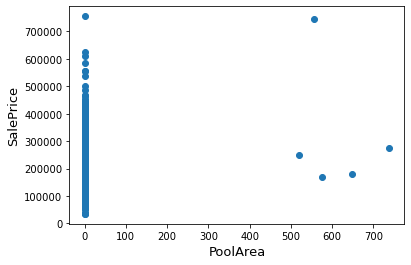

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = train['PoolArea'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('PoolArea', fontsize=13)
plt.show()


In [27]:
train = train.drop(train[(train['PoolArea']>500)].index)

MiscVal :- $Value of miscellaneous feature

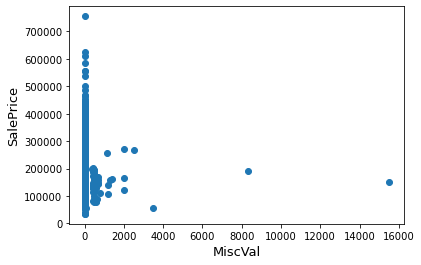

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = train['MiscVal'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('MiscVal', fontsize=13)
plt.show()


In [29]:
train = train.drop(train[(train['MiscVal']>8000)].index)

We have removed the outliers!!!

In [30]:
print("The train data size after removing outliers is : {} ".format(train.shape))

The train data size after removing outliers is : (1439, 80) 


### Coorelation of features with SalePrice

<AxesSubplot:>

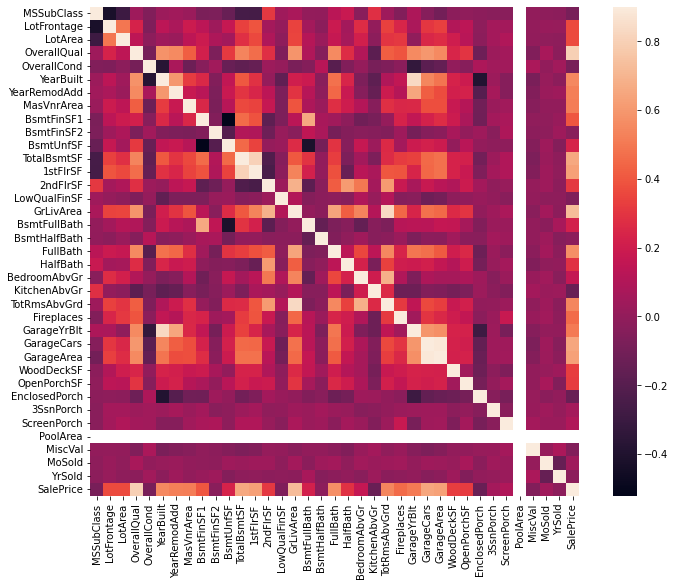

In [31]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Null columns in train set

In [32]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,100.000000
MiscFeature,96.594858
Alley,93.745657
Fence,81.028492
FireplaceQu,47.810980
LotFrontage,17.581654
GarageType,5.628909
GarageYrBlt,5.628909
GarageFinish,5.628909
GarageQual,5.628909


Text(0.5, 1.0, 'Percent missing data by feature')

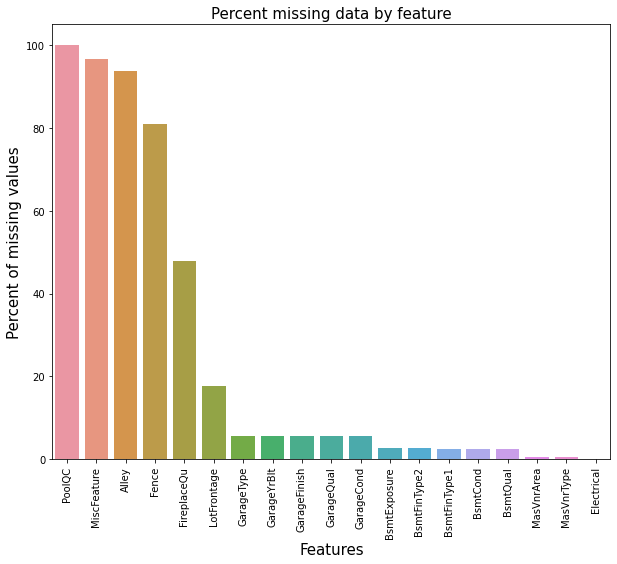

In [33]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Missing Ratio'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Let's see each column listed above and fill nan values with its appropriate value

Since in our train data after removal of outliers, PoolQC has 100% of missing data so it would be better to drop this column

In [34]:
train = train.drop(['PoolQC'],axis = 1)

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None    

In [35]:
train["MiscFeature"] = train["MiscFeature"].fillna("None")

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [36]:
train["Alley"] = train["Alley"].fillna("None")

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [37]:
train["Fence"] = train["Fence"].fillna("None")

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		

In [38]:
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")

LotFrontage: Linear feet of street connected to property

In [39]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [40]:
train["GarageType"] = train["GarageType"].fillna("None")

GarageYrBlt: Year garage was built

In [41]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [42]:
train["GarageFinish"] = train["GarageFinish"].fillna("None")

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		

In [43]:
train["GarageQual"] = train["GarageQual"].fillna("None")

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [44]:
train["GarageCond"] = train["GarageCond"].fillna("None")

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	

In [45]:
train["BsmtExposure"] = train["BsmtExposure"].fillna("None")

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [46]:
train["BsmtFinType2"] = train["BsmtFinType2"].fillna("None")

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		

In [47]:
train["BsmtFinType1"] = train["BsmtFinType1"].fillna("None")


BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	


In [48]:
train["BsmtCond"] = train["BsmtCond"].fillna("None")

		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		

In [49]:
train["BsmtQual"] = train["BsmtQual"].fillna("None")

MasVnrArea: Masonry veneer area in square feet

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [50]:
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

it would be better to replace null values with its mode

In [51]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [52]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


So there is no missing values left

There are some columns which are actually categorical but given numerical values

In [53]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

## Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
cols = ['MSZoning','MiscFeature','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','PavedDrive','SaleType','SaleCondition', "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical", "BsmtFinType1", "ExterQual"]    
for c in cols:
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

In [55]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,9,3,65.0,8450,1,1,3,3,0,4,...,0,0,4,0,0,4,2,8,4,208500
2,4,3,80.0,9600,1,1,3,3,0,2,...,0,0,4,0,0,7,1,8,4,181500
3,9,3,68.0,11250,1,1,0,3,0,4,...,0,0,4,0,0,11,2,8,4,223500
4,10,3,60.0,9550,1,1,0,3,0,0,...,0,0,4,0,0,4,0,8,0,140000
5,9,3,84.0,14260,1,1,0,3,0,2,...,0,0,4,0,0,3,2,8,4,250000


In [56]:
Y = train['SalePrice']
train = train.drop(['SalePrice'],axis = 1)

## Skewed columns 

In [57]:
from scipy import stats
from scipy.stats import norm, skew

In [58]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
Utilities,37.894600
Condition2,11.552602
MiscVal,11.062900
Heating,9.862878
LowQualFinSF,9.412152
...,...
GarageCond,-3.571555
GarageYrBlt,-3.832408
SaleType,-3.842554
Functional,-4.046232


### Box Cox Transormation

In [59]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)

There are 78 skewed numerical features to Box Cox transform


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, Y, test_size=0.3)

In [61]:
measures = {}

## Applying algorithms

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Ridge Regression

In [63]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train,y_train)
y_pred = ridgeR.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("R2_score: ",r2_score(y_test,y_pred))
print("Root mean square error: ",np.sqrt(mse))
measures['Ridge Regression'] = r2_score(y_test,y_pred) 

R2_score:  0.8494987409614934
Root mean square error:  31825.47672359349


Lasso Regression

In [64]:
from sklearn.linear_model import Lasso
lassoL = Lasso(alpha = 1)
lassoL.fit(x_train,y_train)
y_pred = lassoL.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("R2_score: ",r2_score(y_test,y_pred))
print("Root mean square error: ",np.sqrt(mse))
measures['Lasso Regression'] = r2_score(y_test,y_pred) 

R2_score:  0.8505846385183742
Root mean square error:  31710.45518988605


Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators = 50)
rfg.fit(x_train,y_train)
y_pred = rfg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("R2_score: ",r2_score(y_test,y_pred))
print("Root mean square error: ",np.sqrt(mse))
measures['Random Forest Regressor'] = r2_score(y_test,y_pred) 

R2_score:  0.8760029644979748
Root mean square error:  28887.536177918784


Ada Boost

In [66]:
from sklearn.ensemble import AdaBoostRegressor
abg = AdaBoostRegressor(n_estimators = 50)
abg.fit(x_train,y_train)
y_pred = abg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("R2_score: ",r2_score(y_test,y_pred))
print("Root mean square error: ",np.sqrt(mse))
measures['Ada Boost Regressor'] = r2_score(y_test,y_pred) 

R2_score:  0.8354438669089472
Root mean square error:  33278.35788144077


Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
gbg = GradientBoostingRegressor(n_estimators = 50)
gbg.fit(x_train,y_train)
y_pred = gbg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("R2_score: ",r2_score(y_test,y_pred))
print("Root mean square error: ",np.sqrt(mse))
measures['Gradient Boosting Regressor'] = r2_score(y_test,y_pred) 

R2_score:  0.8845385311296157
Root mean square error:  27875.54649134695


XG Boost

In [68]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 50)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("R2_score: ",r2_score(y_test,y_pred))
print("Root mean square error: ",np.sqrt(mse))
measures['XG Boost Regressor'] = r2_score(y_test,y_pred) 

R2_score:  0.875590230169979
Root mean square error:  28935.573506762685


In [69]:
data = pd.DataFrame({'Classifiers':measures.keys(), 'R2_score':measures.values()})

In [70]:
data

,Classifiers,R2_score
0,Ridge Regression,0.849499
1,Lasso Regression,0.850585
2,Random Forest Regressor,0.876003
3,Ada Boost Regressor,0.835444
4,Gradient Boosting Regressor,0.884539
5,XG Boost Regressor,0.875590


<AxesSubplot:xlabel='R2_score', ylabel='Classifiers'>

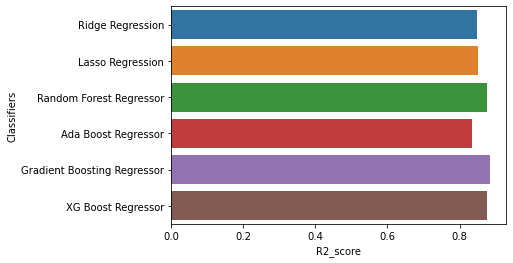

In [71]:
import seaborn as sns
sns.barplot(x=data['R2_score'],y=data['Classifiers'])

## Hypertuning parameters

In [72]:
from sklearn.model_selection import GridSearchCV

Ridge Regression

In [73]:
ridgrR = Ridge()
params = {
    'alpha' :[0.0001,0.001,0.01,0.1,1.0,10,100,1000]
}
grid_search = GridSearchCV(estimator = ridgeR,param_grid = params,cv = 3,n_jobs = -1)
grid_search.fit(x_train,y_train)

print(grid_search.best_score_)
ridgeR_best = grid_search.best_params_
print(ridgeR_best)

0.8590807497673638
{'alpha': 10}


Lasso regression

In [74]:
lassoL = Lasso()
params = {
    'alpha' :[0.0001,0.001,0.01,0.1,1.0,10,100,1000]
}
grid_search = GridSearchCV(estimator = lassoL,param_grid = params,cv = 3,n_jobs = -1)
grid_search.fit(x_train,y_train)

print(grid_search.best_score_)
lassoL_best = grid_search.best_params_
print(lassoL_best)

0.8592395728124251
{'alpha': 100}


Gradient Boosting

In [75]:
gb = GradientBoostingRegressor()
params ={
    'n_estimators':range(1,100),
    'max_depth':range(1,20), 
}
grid_search = GridSearchCV(estimator = gb,param_grid = params,cv = 3,n_jobs = -1)
grid_search.fit(x_train,y_train)

print(grid_search.best_score_)
gb_best = grid_search.best_params_
print(gb_best)

0.8991356256828863
{'max_depth': 3, 'n_estimators': 99}


In [76]:
gb = GradientBoostingRegressor(max_depth = 3,n_estimators = 93)
params ={
      'min_samples_leaf':range(1,100),
    'max_features':range(1,20)
}
grid_search = GridSearchCV(estimator = gb,param_grid = params,cv = 3,n_jobs = -1)
grid_search.fit(x_train,y_train)

print(grid_search.best_score_)
gb_best = grid_search.best_params_
print(gb_best)
  

0.9035759548233031
{'max_features': 19, 'min_samples_leaf': 2}


XG Boost

In [77]:
params = {
    'max_depth' : range(1,101),
    'min_child_weight':range(1,11),
}
grid_search = GridSearchCV(estimator = XGBRegressor(),param_grid = params,n_jobs = -1,cv = 3)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
xg_best = grid_search.best_params_
print(xg_best)

0.9016737979328959
{'max_depth': 2, 'min_child_weight': 2}


Random Forest Regressor

In [78]:
rf = RandomForestRegressor()
params ={
    'max_depth':range(1,100),
    'min_samples_leaf':[5,10,20,50,100,150,200],
    'n_estimators':[10,25,30,50,100,200]
}
grid_search = GridSearchCV(estimator = rf,param_grid = params,cv = 3,n_jobs = -1)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
rf_best = grid_search.best_params_
print(rf_best)

0.8717858000421077
{'max_depth': 65, 'min_samples_leaf': 5, 'n_estimators': 30}


 hence gradient boosting regressor is giving best results in our case

## Transformations on our test set

In [79]:
all_data_na = (test.isnull().sum() / len(test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageYrBlt,5.346127
GarageQual,5.346127
GarageFinish,5.346127


Text(0.5, 1.0, 'Percent missing data by feature')

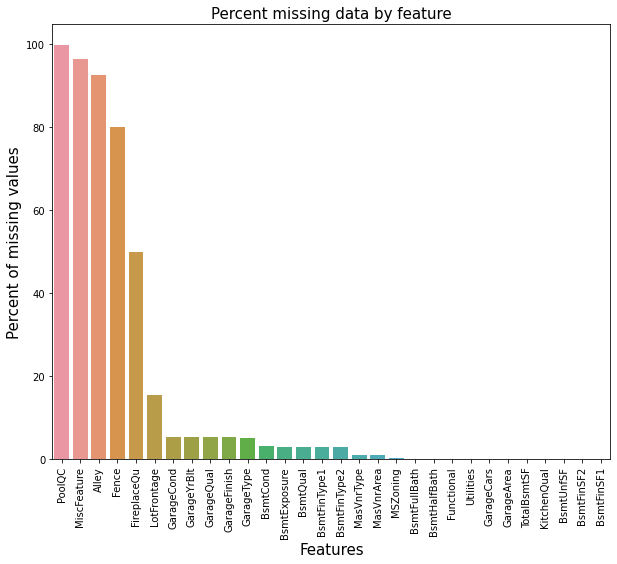

In [80]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Missing Ratio'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [81]:
test = test.drop(['PoolQC'],axis = 1)

In [82]:
test["MiscFeature"] = test["MiscFeature"].fillna("None")

In [83]:
test["Alley"] = test["Alley"].fillna("None")

In [84]:
test["Fence"] = test["Fence"].fillna("None")

In [85]:
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")

In [86]:
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [87]:
test["GarageCond"] = test["GarageCond"].fillna("None")

In [88]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [89]:
test["GarageQual"] = test["GarageQual"].fillna("None")

In [90]:
test["GarageFinish"] = test["GarageFinish"].fillna("None")

In [91]:
test["GarageType"] = test["GarageType"].fillna("None")

In [92]:
test["BsmtCond"] = test["BsmtCond"].fillna("None")

In [93]:
test["BsmtExposure"] = test["BsmtExposure"].fillna("None")

In [94]:
test["BsmtQual"] = test["BsmtQual"].fillna("None")

In [95]:
test["BsmtFinType1"] = test["BsmtFinType1"].fillna("None")

In [96]:
test["BsmtFinType2"] = test["BsmtFinType2"].fillna("None")

In [97]:
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [98]:
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms    

In [99]:
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [100]:
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [101]:
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])

GarageCars: Size of garage in car capacity

In [102]:
test['GarageCars'] = test['GarageCars'].fillna(0)

GarageArea: Size of garage in square feet

In [103]:
test['GarageArea'] = test['GarageArea'].fillna(0)

TotalBsmtSF: Total square feet of basement area

In [104]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [105]:
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

BsmtUnfSF: Unfinished square feet of basement area

In [106]:
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0)

BsmtFinSF1: Type 1 finished square feet
    
BsmtFinSF2: Type 2 finished square feet   

In [107]:
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(0)

In [108]:
all_data_na = (test.isnull().sum() / len(test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
Exterior1st,0.06854
Exterior2nd,0.06854
SaleType,0.06854


Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [109]:
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [110]:
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

In [111]:
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['OverallCond'] = test['OverallCond'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [112]:
cols = ('MSZoning','Street','LotShape','LandContour','Alley','Fence','MiscFeature','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','Foundation','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','PavedDrive','SaleType','SaleCondition', "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical", "BsmtFinType1", "ExterQual")
for c in cols:
    le = LabelEncoder()
    test[c]= le.fit_transform(test[c].values)

In [113]:
cols = ('MSSubClass','OverallCond','YrSold','MoSold')
for c in cols:
    test[c]= le.fit_transform(test[c].values)

In [114]:
numeric_feats = train.dtypes[test.dtypes != "object"].index

skewed_feats = test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
Heating,14.475300
3SsnPorch,12.511336
...,...
SaleType,-3.601798
GarageCond,-3.611514
GarageYrBlt,-3.947954
Functional,-3.983127


In [115]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    test[feat] = boxcox1p(test[feat], lam)

There are 78 skewed numerical features to Box Cox transform


In [116]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,2.055642,1.194318,6.221214,20.479373,0.730463,0.730463,1.540963,1.540963,0.0,...,0.0,7.020909,0.0,1.194318,0.730463,0.000000,2.602594,1.820334,2.602594,1.820334
1,1462,2.055642,1.540963,6.244956,21.327220,0.730463,0.730463,0.000000,1.540963,0.0,...,0.0,0.000000,0.0,1.820334,0.000000,20.777526,2.602594,1.820334,2.602594,1.820334
2,1463,2.885846,1.540963,6.073289,21.196905,0.730463,0.730463,0.000000,1.540963,0.0,...,0.0,0.000000,0.0,1.194318,0.730463,0.000000,2.055642,1.820334,2.602594,1.820334
3,1464,2.885846,1.540963,6.172972,19.865444,0.730463,0.730463,0.000000,1.540963,0.0,...,0.0,0.000000,0.0,1.820334,0.730463,0.000000,2.602594,1.820334,2.602594,1.820334
4,1465,0.000000,1.540963,5.093857,17.257255,0.730463,0.730463,0.000000,0.730463,0.0,...,0.0,7.397498,0.0,1.820334,0.730463,0.000000,0.000000,1.820334,2.602594,1.820334


In [117]:
test =test.set_index('Id')

In [118]:
gb = GradientBoostingRegressor(max_depth = 3,n_estimators = 99,max_features = 19,min_samples_leaf = 2)
gb.fit(x_train,y_train)
y_pred = gb.predict(test)
y_pred

array([128317.58131702, 156756.90750152, 175119.7313263 , ...,
       159306.20301145, 119092.55773575, 245029.16629158])

In [119]:
xgb = XGBRegressor(max_depth = 2,min_child_weight = 2)
xgb.fit(x_train,y_train)
y_pred1 = xgb.predict(test)
y_pred1

array([120022.36, 164910.77, 177019.83, ..., 151672.08, 127338.04,
       225276.73], dtype=float32)

In [120]:
test = test.reset_index('Id')

submission1

In [123]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": y_pred
    })

In [124]:
submission.to_csv('sample_submission.csv', index=False)